In [36]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

In [37]:
#Load the dataset
data = pd.read_csv("./data/credit_risk.csv")

In [38]:
# Display the first 10 rowa
data.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [39]:
#brief info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [40]:
#Statistics summary
data.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [41]:
#Check for duplicate
data.duplicated().sum()

0

In [42]:
#Check the percentage of null values in each column
null_percentage = data.isnull().sum() / len(data) * 100
null_percentage

Id                0.000000
Age               0.000000
Income            0.000000
Home              0.000000
Emp_length        2.747000
Intent            0.000000
Amount            0.000000
Rate              9.563856
Status            0.000000
Percent_income    0.000000
Default           0.000000
Cred_length       0.000000
dtype: float64

In [43]:
# Fill the NaN values in the 'Rate' and Emp_length column with the calculated mean
data['Rate'].fillna(data['Rate'].mean(), inplace=True)
data['Emp_length'].fillna(data['Emp_length'].mean(), inplace=True)



In [44]:
#brief info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      32581 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            32581 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


Column: Home, Unique Values: 4
Home
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64 Home
RENT        0.504773
MORTGAGE    0.412633
OWN         0.079310
OTHER       0.003284
Name: proportion, dtype: float64


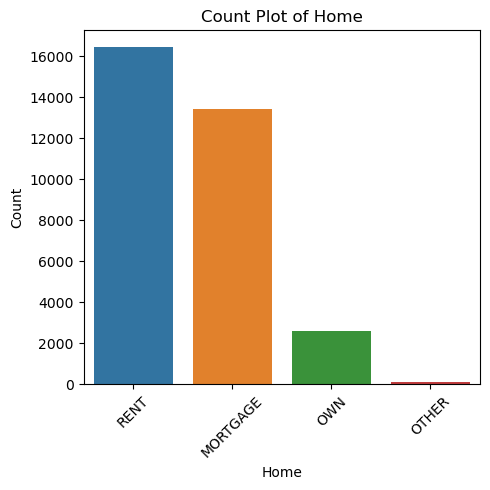

Column: Intent, Unique Values: 6
Intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64 Intent
EDUCATION            0.198060
MEDICAL              0.186336
VENTURE              0.175532
PERSONAL             0.169455
DEBTCONSOLIDATION    0.159971
HOMEIMPROVEMENT      0.110647
Name: proportion, dtype: float64


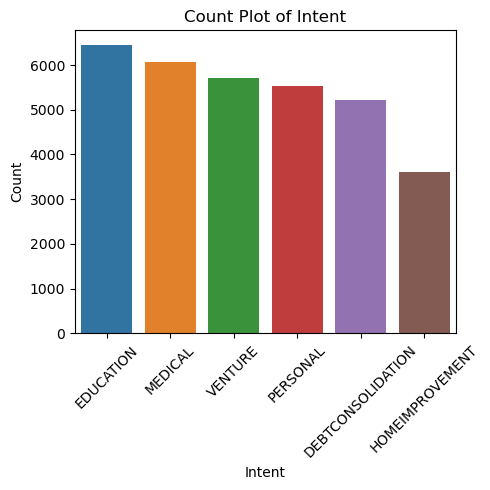

Column: Default, Unique Values: 2
Default
N    26836
Y     5745
Name: count, dtype: int64 Default
N    0.82367
Y    0.17633
Name: proportion, dtype: float64


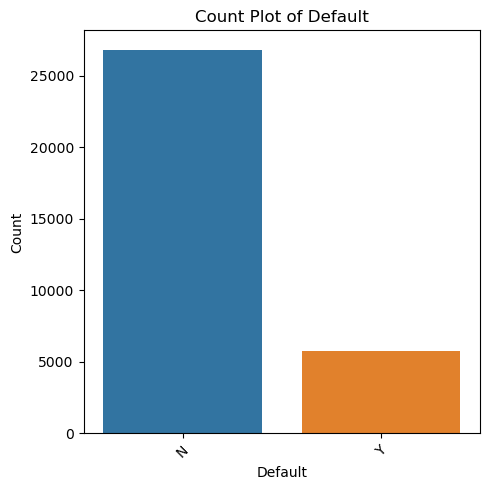

In [45]:
categorical_columns = data.select_dtypes(include=['object']).columns
# Select categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Loop through each categorical column, display unique values count, and plot countplots
for col in categorical_columns:
    unique_values_count = data[col].nunique()
    print(f"Column: {col}, Unique Values: {unique_values_count}")
    print(data[col].value_counts(), data[col].value_counts(normalize=True))
    
    # Sort the categories in order for better visualization
    sorted_categories = data[col].value_counts().index
    
    # Plot count plot
    plt.figure(figsize=(5,5))
    sns.countplot(x=col, data=data, order=sorted_categories)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate labels if necessary
    plt.tight_layout()
    plt.show()
    plt.show()

C:\Users\r.ayittah\AppData\Local\Temp\ipykernel_29832\3458828796.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\r.ayittah\AppData\Local\Temp\ipykernel_29832\3458828796.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\r.ayittah\AppData\Local\Temp\ipykernel_29832\3458828796.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\r.ayittah\AppData\Local\Temp\ipykernel_29832\3458828796.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\r.ayittah\AppData\Local\Temp\ipykernel_29832\3458828796.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\r.ayittah\AppData\Local\Temp\ipykernel_29832\3458828796.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


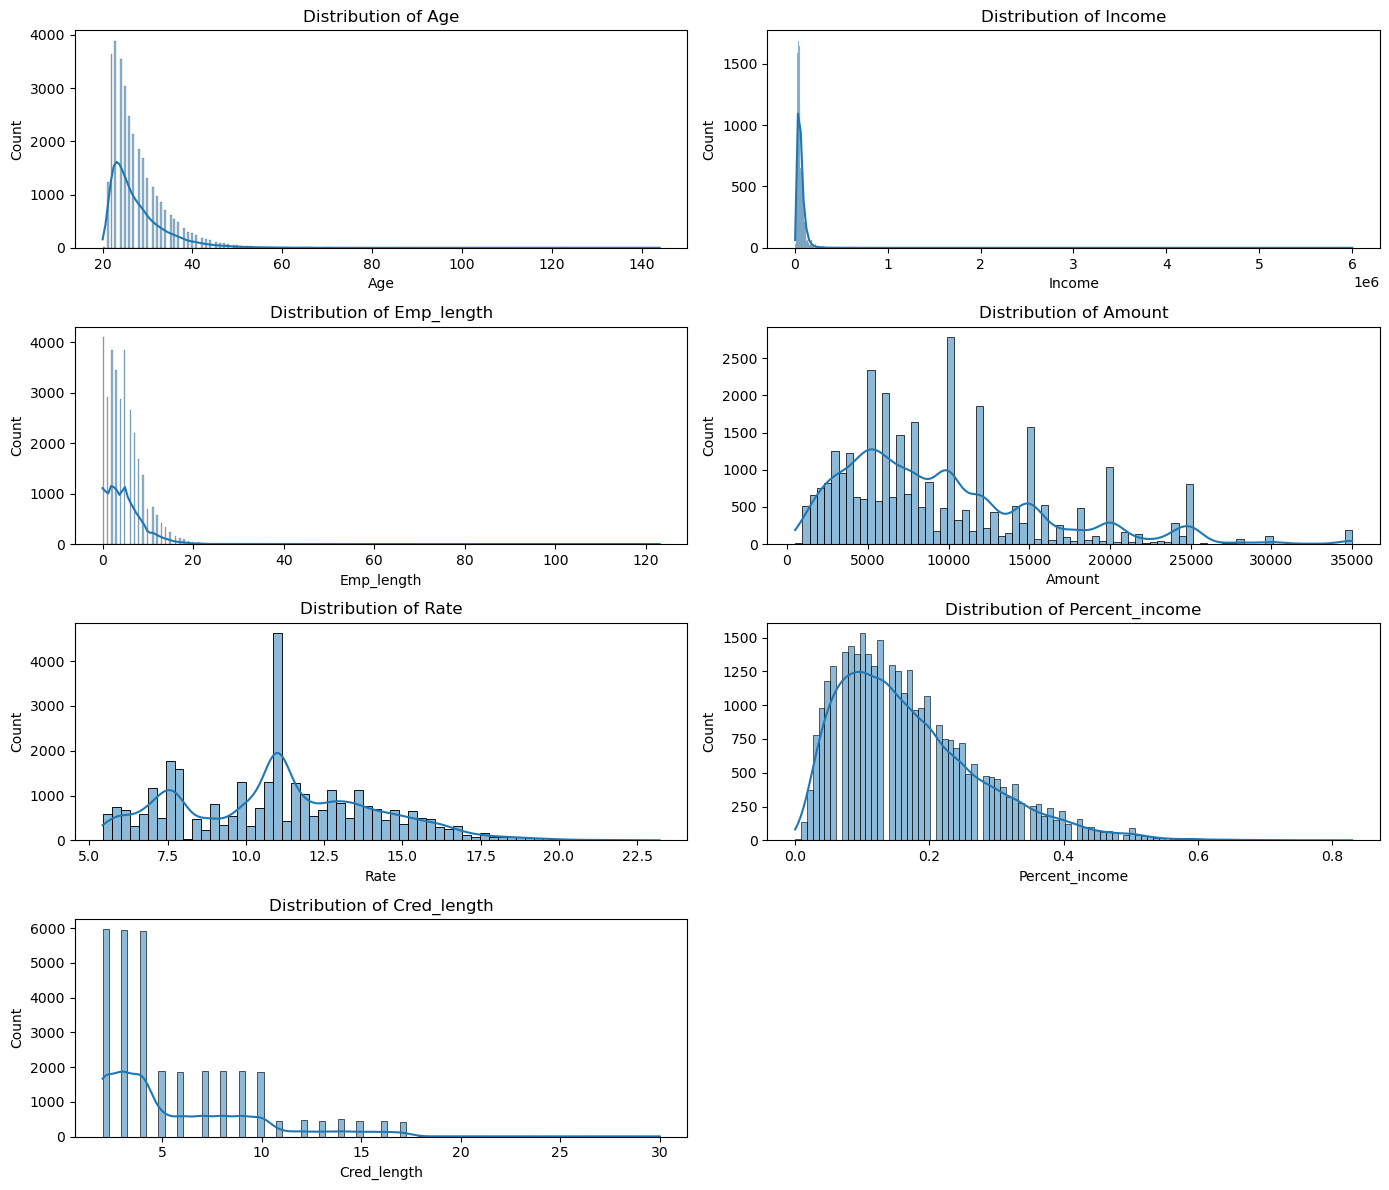

In [46]:
numeric_columns = ['Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Percent_income', 'Cred_length']
plt.figure(figsize=(14, 12))

# Plot each numeric column
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)  # Adjust based on the number of columns
    sns.histplot(data[col], kde=True)  # Histogram with KDE
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

C:\Users\r.ayittah\AppData\Local\Temp\ipykernel_29832\2084227134.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\r.ayittah\AppData\Local\Temp\ipykernel_29832\2084227134.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\r.ayittah\AppData\Local\Temp\ipykernel_29832\2084227134.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\r.ayittah\AppData\Local\Temp\ipykernel_29832\2084227134.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\r.ayittah\AppData\Local\Temp\ipykernel_29832\2084227134.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\r.ayittah\AppData\Local\Temp\ipykernel_29832\2084227134.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


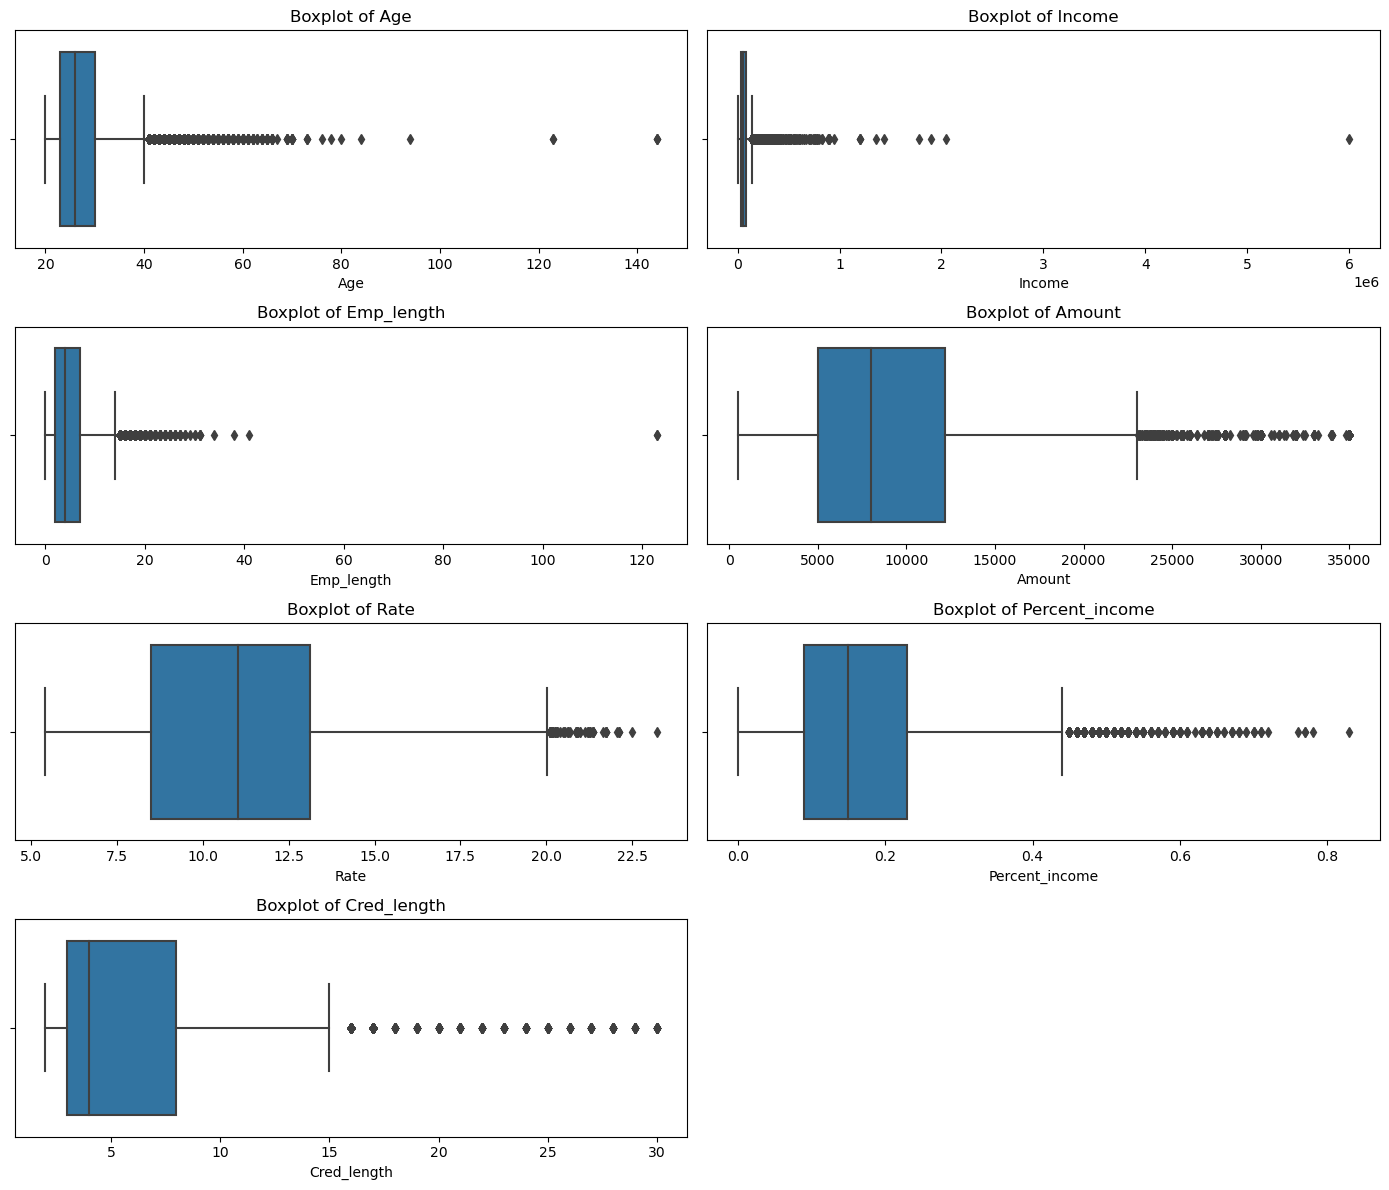

In [47]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Plot each numeric column using boxplot
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [48]:
#Handling ouliers
# data = data[data['Amount']<= 25000]
# data = data[data['Age']<= 60]
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Amount'].quantile(0.25)
Q3 = data['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = data[(data['Amount'] < lower_bound) | (data['Amount'] > upper_bound)]
print(f"Number of outliers in Amount: {outliers.shape[0]}")

# Remove outliers
data_cleaned = data[(data['Amount'] >= lower_bound) & (data['Amount'] <= upper_bound)]

data_cleaned = data_cleaned[(data_cleaned["Age"] < 80) & (data_cleaned['Emp_length'] < 80)]
print(f"Shape of the dataset after removing outliers: {data_cleaned.shape}")


Number of outliers in Amount: 1689
Shape of the dataset after removing outliers: (30883, 12)


C:\Users\r.ayittah\AppData\Local\Temp\ipykernel_29832\4079840271.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\r.ayittah\AppData\Local\Temp\ipykernel_29832\4079840271.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\r.ayittah\AppData\Local\Temp\ipykernel_29832\4079840271.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\r.ayittah\AppData\Local\Temp\ipykernel_29832\4079840271.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\r.ayittah\AppData\Local\Temp\ipykernel_29832\4079840271.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\r.ayittah\AppData\Local\Temp\ipykernel_29832\4079840271.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


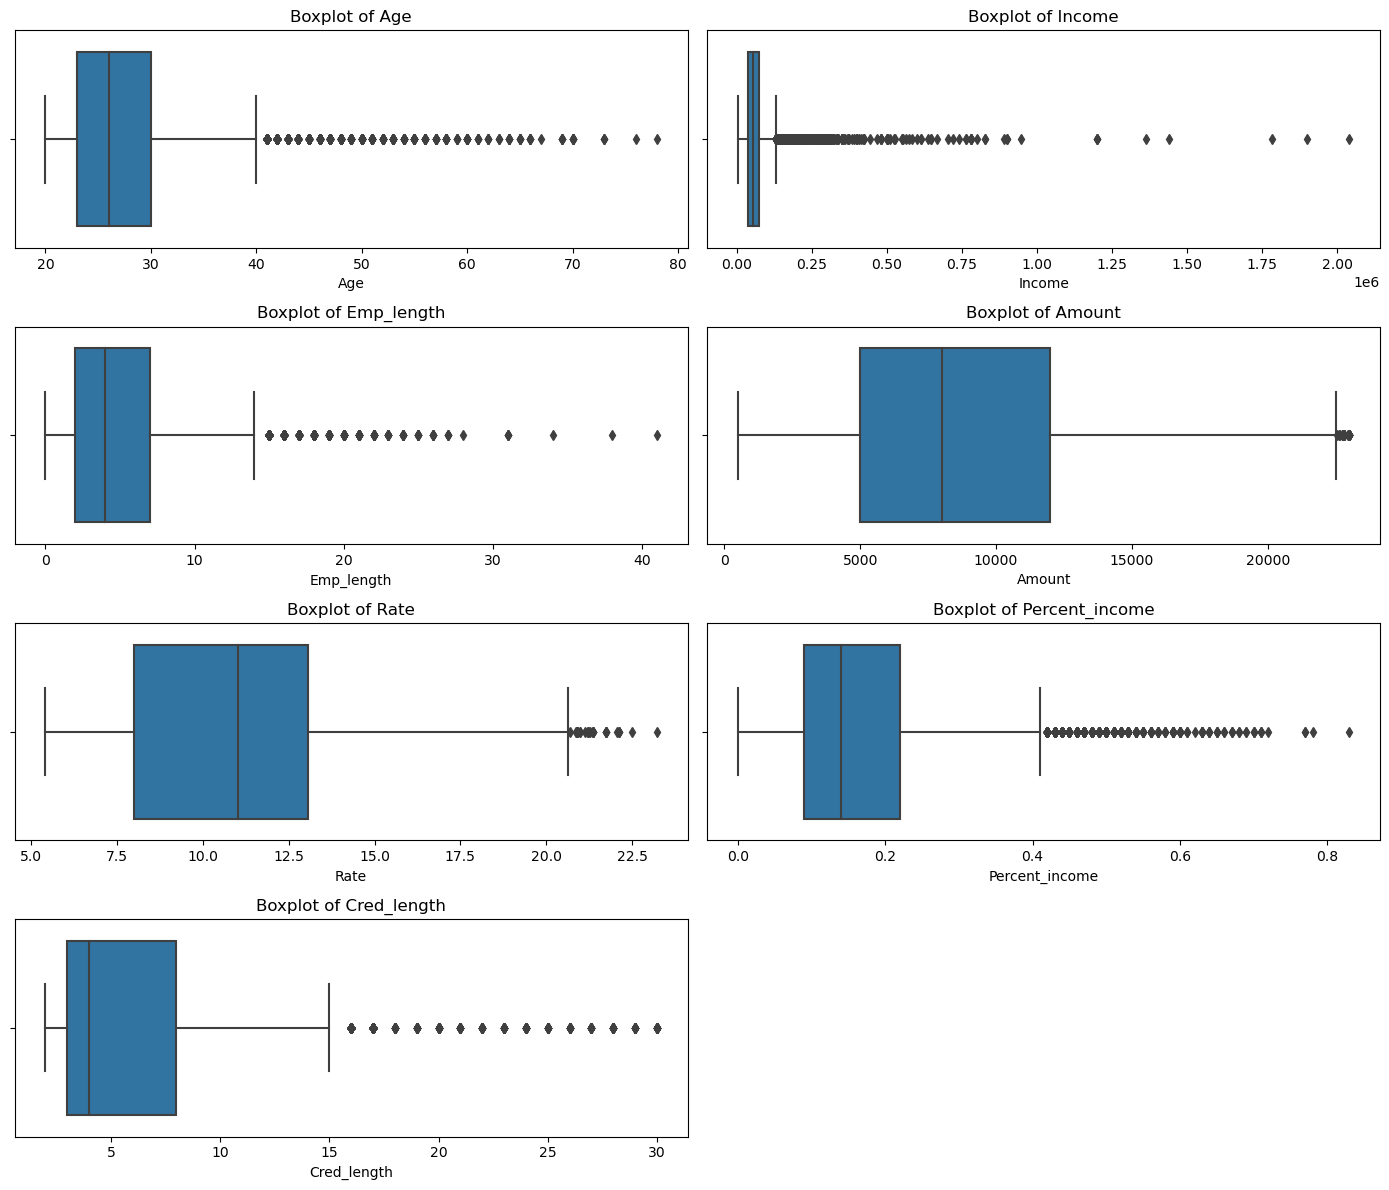

In [49]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Plot each numeric column using boxplot
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=data_cleaned[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [50]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30883 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              30883 non-null  int64  
 1   Age             30883 non-null  int64  
 2   Income          30883 non-null  int64  
 3   Home            30883 non-null  object 
 4   Emp_length      30883 non-null  float64
 5   Intent          30883 non-null  object 
 6   Amount          30883 non-null  int64  
 7   Rate            30883 non-null  float64
 8   Status          30883 non-null  int64  
 9   Percent_income  30883 non-null  float64
 10  Default         30883 non-null  object 
 11  Cred_length     30883 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.1+ MB


In [51]:
data_cleaned.describe()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,30883.000000,30883.000000,3.088300e+04,30883.000000,30883.000000,30883.000000,30883.000000,30883.000000,30883.000000
mean,16225.960269,27.663083,6.301341e+04,4.720363,8663.831234,10.923378,0.210407,0.164265,5.775378
std,9359.410303,6.158963,4.912745e+04,3.936917,4997.821544,3.051814,0.407604,0.102919,4.032945
min,1.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8035.500000,23.000000,3.780000e+04,2.000000,5000.000000,8.000000,0.000000,0.090000,3.000000
50%,16183.000000,26.000000,5.400000e+04,4.000000,8000.000000,11.011695,0.000000,0.140000,4.000000
75%,24267.500000,30.000000,7.500000e+04,7.000000,12000.000000,13.060000,0.000000,0.220000,8.000000
max,32780.000000,78.000000,2.039784e+06,41.000000,23000.000000,23.220000,1.000000,0.830000,30.000000


In [52]:
# Define function to categorize age
def categorize_age(age):
    if age < 25:
        return '18-24'
    elif 25 <= age < 35:
        return '25-34'
    elif 35 <= age < 45:
        return '35-44'
    elif 45 <= age < 55:
        return '45-54'
    elif 55 <= age < 65:
        return '55-64'
    elif 65 <= age < 80:
        return '65-79'
    else:
        return '80+'
    
# Define function to categorize amount
def categorize_amount(amount):
    if amount < 3000:
        return 'Very Low'
    elif 3000 <= amount < 6000:
        return 'Low'
    elif 6000 <= amount < 9000:
        return 'Medium'
    elif 9000 <= amount < 12000:
        return 'High'
    else:
        return 'Very High'

def categorize_emp_length(emp_length):
    if emp_length == 0:
        return 'No Experience'
    elif 0 < emp_length <= 2:
        return 'Junior'
    elif 2 < emp_length <= 5:
        return 'Mid-level'
    elif 5 < emp_length <= 10:
        return 'Senior'
    else:
        return 'Veteran'
    
def categorize_cred_length(cred_length):
    if cred_length < 2:
        return 'New'
    elif 2 <= cred_length < 5:
        return 'Short'
    elif 5 <= cred_length < 10:
        return 'Moderate'
    elif 10 <= cred_length < 20:
        return 'Long'
    else:
        return 'Very Long'
    
def categorize_rate(rate):
    if rate < 5:
        return 'Low Rate'
    elif 5 <= rate < 10:
        return 'Medium Rate'
    elif 10 <= rate < 20:
        return 'High Rate'
    else:
        return 'Very High Rate'
    
def categorize_percent_income(percent_income):
    if percent_income < 0.09:
        return 'Low Percent Income'
    elif 0.09 <= percent_income < 0.14:
        return 'Moderate Percent Income'
    elif 0.14 <= percent_income < 0.22:
        return 'High Percent Income'
    else:
        return 'Very High Percent Income'

# Apply the function to create a new column
data_cleaned['Percent_income_category'] = data_cleaned['Percent_income'].apply(categorize_percent_income)

# Apply the function to create a new column
data_cleaned['Rate_category'] = data_cleaned['Rate'].apply(categorize_rate)

# Apply the function to create a new column
data_cleaned['Cred_length_category'] = data_cleaned['Cred_length'].apply(categorize_cred_length)
    
data_cleaned['Age_category'] = data_cleaned['Age'].apply(categorize_age)
data_cleaned['Amount_category'] = data_cleaned['Amount'].apply(categorize_amount)
data_cleaned['Emp_length_category'] = data_cleaned['Emp_length'].apply(categorize_emp_length)


In [53]:
data_cleaned

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length,Percent_income_category,Rate_category,Cred_length_category,Age_category,Amount_category,Emp_length_category
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2,Moderate Percent Income,High Rate,Short,18-24,Very Low,Mid-level
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3,Very High Percent Income,High Rate,Short,25-34,Low,Junior
5,5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2,Very High Percent Income,Medium Rate,Short,18-24,Very Low,Junior
9,9,21,10000,OWN,6.0,VENTURE,1600,14.74,1,0.16,N,3,High Percent Income,High Rate,Short,18-24,Very Low,Senior
11,11,21,10000,OWN,2.0,HOMEIMPROVEMENT,4500,8.63,1,0.45,N,2,Very High Percent Income,Medium Rate,Short,18-24,Low,Junior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32575,32575,52,64500,RENT,0.0,EDUCATION,5000,11.26,0,0.08,N,20,Low Percent Income,High Rate,Very Long,45-54,Low,No Experience
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30,Moderate Percent Income,High Rate,Very Long,55-64,Low,Junior
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19,High Percent Income,Medium Rate,Long,45-54,Very High,Mid-level
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26,Moderate Percent Income,High Rate,Very Long,55-64,Very High,Mid-level


Column: Home, Unique Values: 4
Home
RENT        15871
MORTGAGE    12450
OWN          2461
OTHER         101
Name: count, dtype: int64 Home
RENT        0.513907
MORTGAGE    0.403134
OWN         0.079688
OTHER       0.003270
Name: proportion, dtype: float64


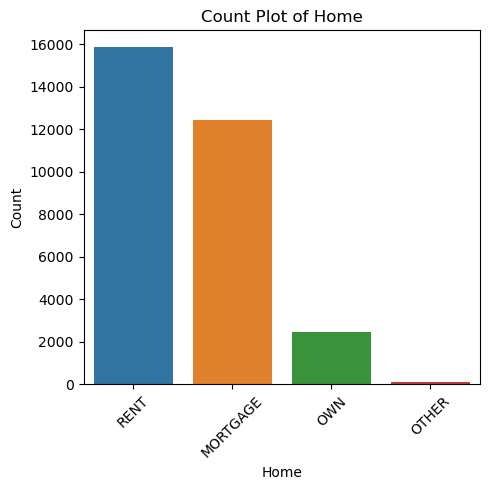

Column: Intent, Unique Values: 6
Intent
EDUCATION            6136
MEDICAL              5774
VENTURE              5446
PERSONAL             5220
DEBTCONSOLIDATION    4939
HOMEIMPROVEMENT      3368
Name: count, dtype: int64 Intent
EDUCATION            0.198685
MEDICAL              0.186964
VENTURE              0.176343
PERSONAL             0.169025
DEBTCONSOLIDATION    0.159926
HOMEIMPROVEMENT      0.109057
Name: proportion, dtype: float64


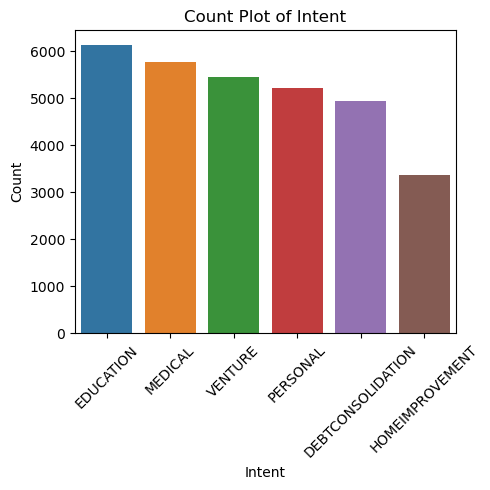

Column: Default, Unique Values: 2
Default
N    25541
Y     5342
Name: count, dtype: int64 Default
N    0.827025
Y    0.172975
Name: proportion, dtype: float64


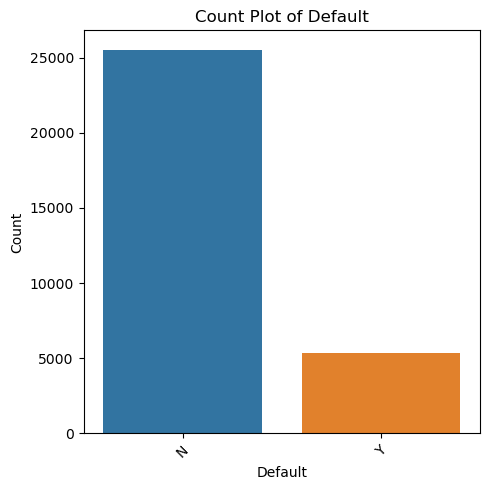

Column: Percent_income_category, Unique Values: 4
Percent_income_category
High Percent Income         8381
Very High Percent Income    8037
Low Percent Income          7527
Moderate Percent Income     6938
Name: count, dtype: int64 Percent_income_category
High Percent Income         0.271379
Very High Percent Income    0.260240
Low Percent Income          0.243726
Moderate Percent Income     0.224654
Name: proportion, dtype: float64


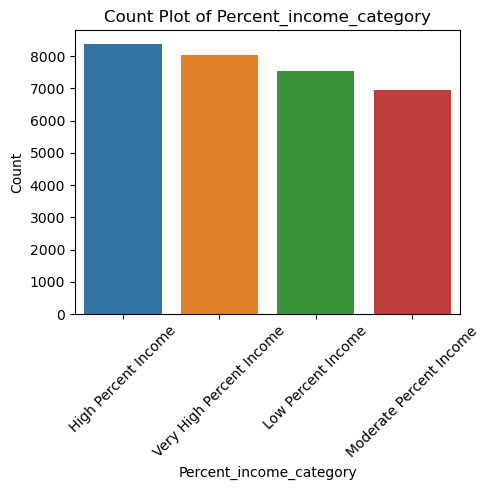

Column: Rate_category, Unique Values: 3
Rate_category
High Rate         19640
Medium Rate       11188
Very High Rate       55
Name: count, dtype: int64 Rate_category
High Rate         0.635949
Medium Rate       0.362271
Very High Rate    0.001781
Name: proportion, dtype: float64


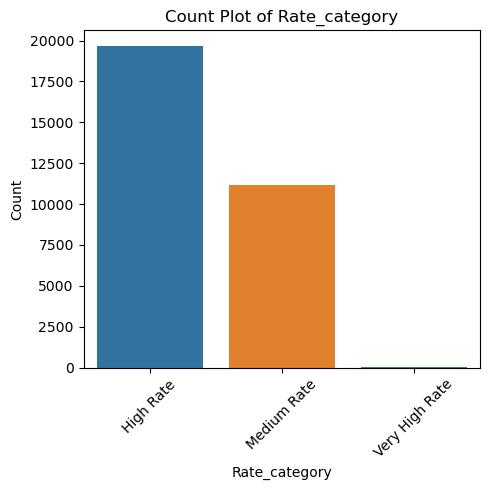

Column: Cred_length_category, Unique Values: 4
Cred_length_category
Short        17024
Moderate      8884
Long          4752
Very Long      223
Name: count, dtype: int64 Cred_length_category
Short        0.551242
Moderate     0.287666
Long         0.153871
Very Long    0.007221
Name: proportion, dtype: float64


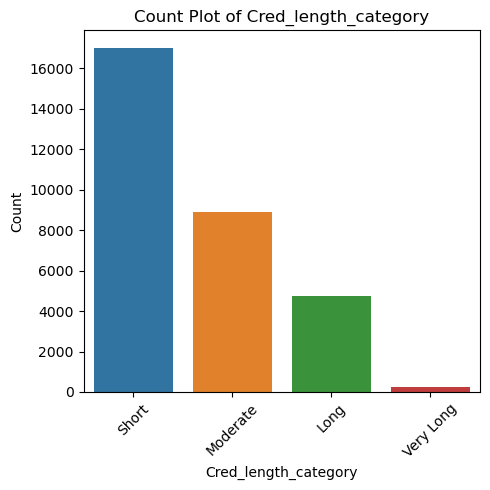

Column: Age_category, Unique Values: 6
Age_category
25-34    15260
18-24    11805
35-44     3107
45-54      572
55-64      109
65-79       30
Name: count, dtype: int64 Age_category
25-34    0.494123
18-24    0.382249
35-44    0.100606
45-54    0.018522
55-64    0.003529
65-79    0.000971
Name: proportion, dtype: float64


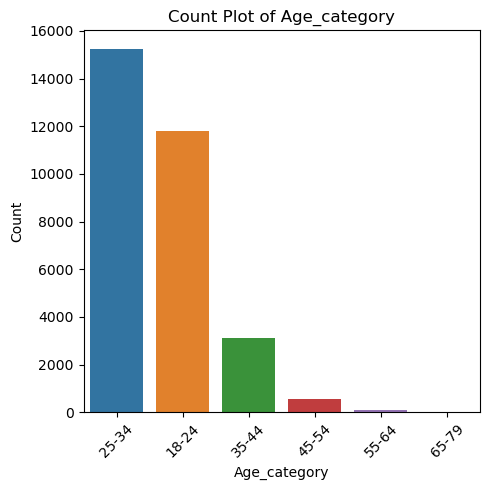

Column: Amount_category, Unique Values: 5
Amount_category
Very High    8287
Low          7446
Medium       7118
High         5085
Very Low     2947
Name: count, dtype: int64 Amount_category
Very High    0.268335
Low          0.241104
Medium       0.230483
High         0.164654
Very Low     0.095425
Name: proportion, dtype: float64


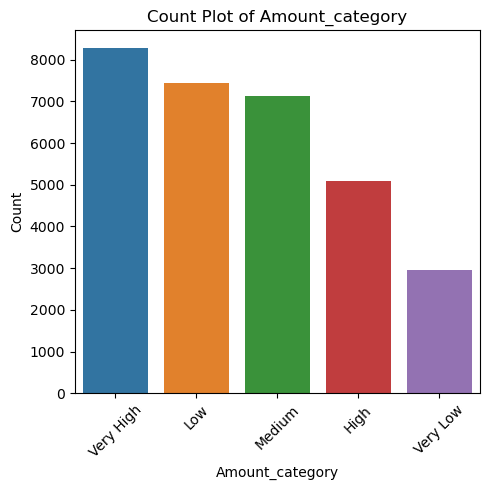

Column: Emp_length_category, Unique Values: 5
Emp_length_category
Mid-level        9696
Senior           8060
Junior           6473
No Experience    3969
Veteran          2685
Name: count, dtype: int64 Emp_length_category
Mid-level        0.313959
Senior           0.260985
Junior           0.209598
No Experience    0.128517
Veteran          0.086941
Name: proportion, dtype: float64


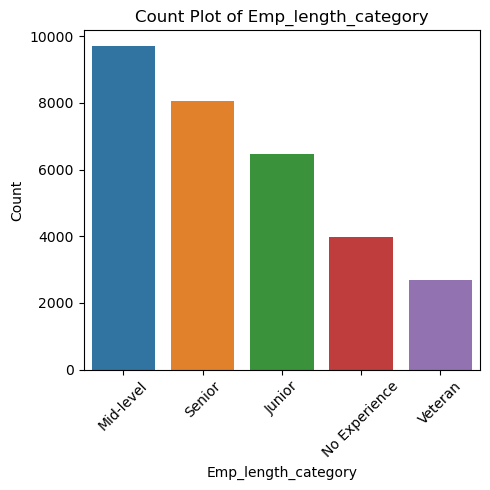

In [54]:
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
# Select categorical columns
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

# Loop through each categorical column, display unique values count, and plot countplots
for col in categorical_columns:
    unique_values_count = data_cleaned[col].nunique()
    print(f"Column: {col}, Unique Values: {unique_values_count}")
    print(data_cleaned[col].value_counts(), data_cleaned[col].value_counts(normalize=True))
    
    # Sort the categories in order for better visualization
    sorted_categories = data_cleaned[col].value_counts().index
    
    # Plot count plot
    plt.figure(figsize=(5,5))
    sns.countplot(x=col, data=data_cleaned, order=sorted_categories)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate labels if necessary
    plt.tight_layout()
    plt.show()
    plt.show()

In [55]:
data_cleaned.columns


Index(['Id', 'Age', 'Income', 'Home', 'Emp_length', 'Intent', 'Amount', 'Rate',
       'Status', 'Percent_income', 'Default', 'Cred_length',
       'Percent_income_category', 'Rate_category', 'Cred_length_category',
       'Age_category', 'Amount_category', 'Emp_length_category'],
      dtype='object')

Percentage distribution for Home:
Home      MORTGAGE     OTHER       OWN       RENT
Default                                          
N        41.803375  0.289730  8.002819  49.904076
Y        33.189817  0.505429  7.806065  58.498690



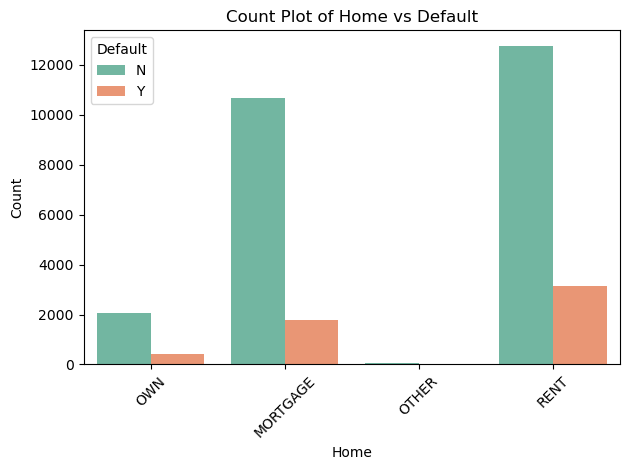

Percentage distribution for Intent:
Intent   DEBTCONSOLIDATION  EDUCATION  HOMEIMPROVEMENT    MEDICAL   PERSONAL  \
Default                                                                        
N                15.962570  19.975725        10.688697  18.691516  16.988372   
Y                16.136279  19.356046        11.943092  18.719581  16.491951   

Intent     VENTURE  
Default             
N        17.693121  
Y        17.353051  



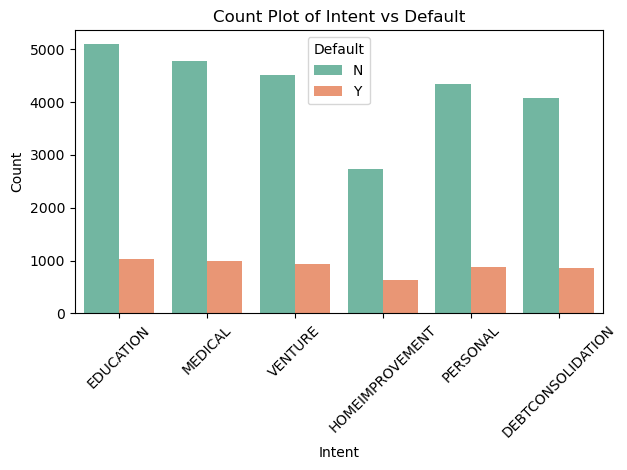

Percentage distribution for Status:
Status           0          1
Default                      
N        82.248150  17.751850
Y        63.234744  36.765256



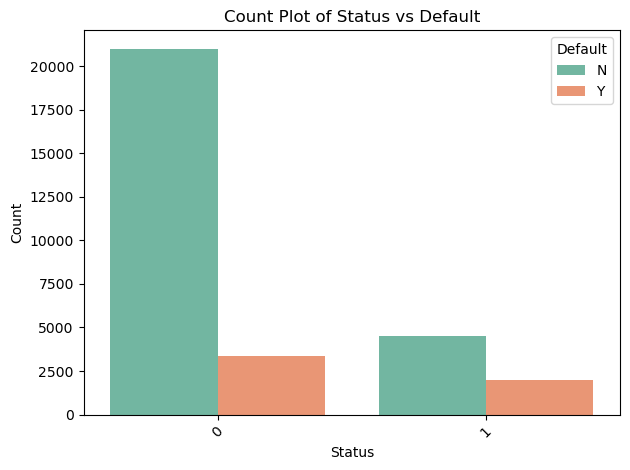

Percentage distribution for Rate_category:
Rate_category  High Rate  Medium Rate  Very High Rate
Default                                              
N              56.101954     43.80408        0.093967
Y              99.419693          NaN        0.580307



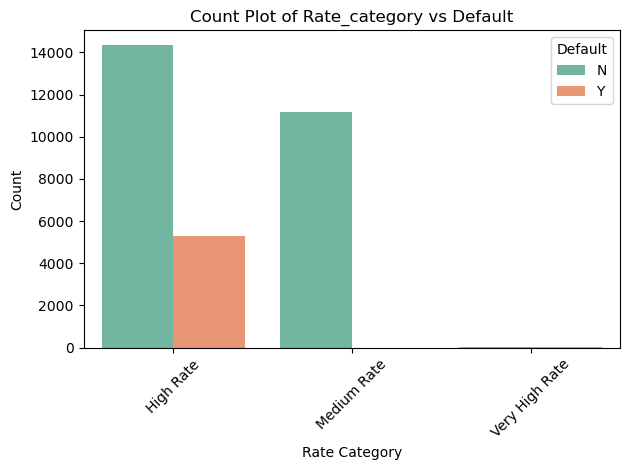

Percentage distribution for Age_category:
Age_category      18-24      25-34      35-44     45-54     55-64     65-79
Default                                                                    
N             38.365765  49.320700  10.003524  1.867585  0.360205  0.082221
Y             37.551479  49.850243  10.333209  1.778360  0.318233  0.168476



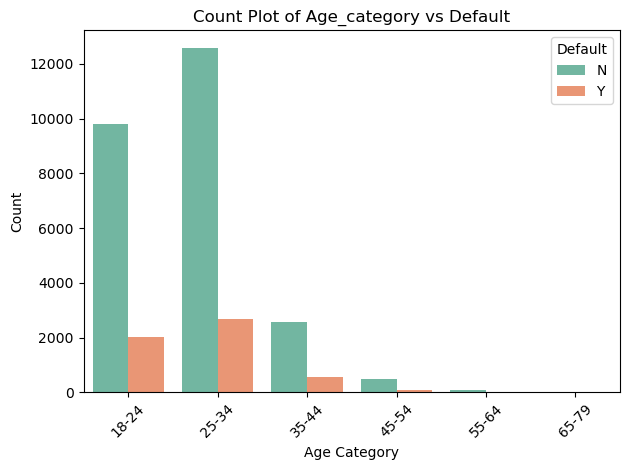

Percentage distribution for Amount_category:
Amount_category       High        Low     Medium  Very High   Very Low
Default                                                               
N                16.589014  24.329509  23.448573  26.420265   9.212639
Y                15.874204  23.062523  21.134407  28.809435  11.119431



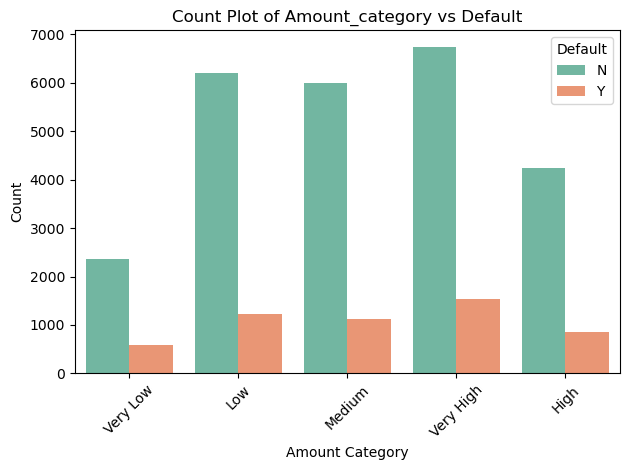

Percentage distribution for Emp_length_category:
Emp_length_category     Junior  Mid-level  No Experience     Senior   Veteran
Default                                                                      
N                    20.700051  31.337849      12.571943  26.494656  8.895501
Y                    22.201423  31.673531      14.189442  24.204418  7.731187



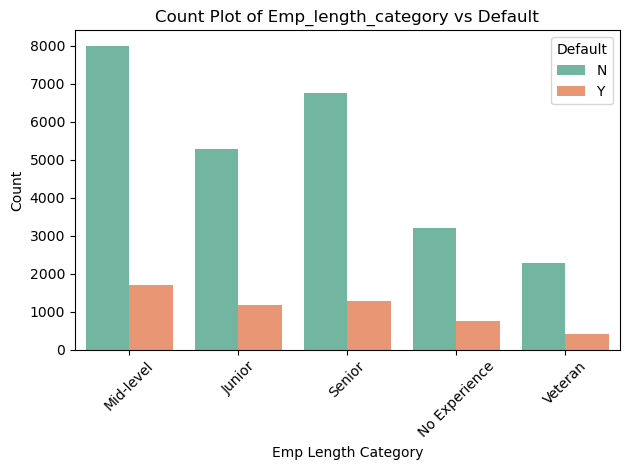

Percentage distribution for Cred_length_category:
Cred_length_category       Long   Moderate      Short  Very Long
Default                                                         
N                     15.359618  28.648056  55.271916   0.720410
Y                     15.518532  29.333583  54.417821   0.730064



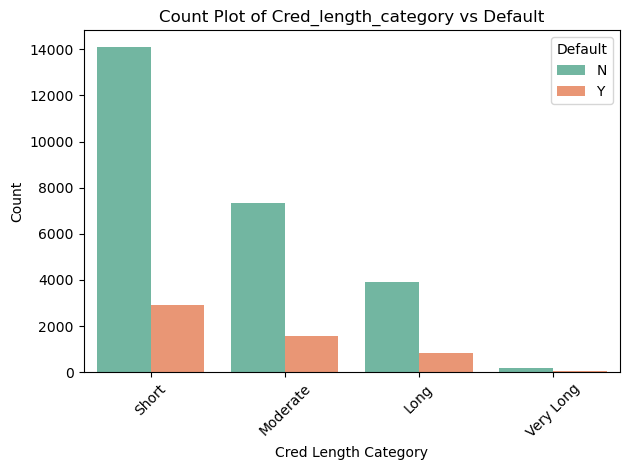

Percentage distribution for Percent_income_category:
Percent_income_category  High Percent Income  Low Percent Income  \
Default                                                            
N                                  27.109354           24.705376   
Y                                  27.274429           22.781730   

Percent_income_category  Moderate Percent Income  Very High Percent Income  
Default                                                                     
N                                      22.775146                 25.410125  
Y                                      20.984650                 28.959191  



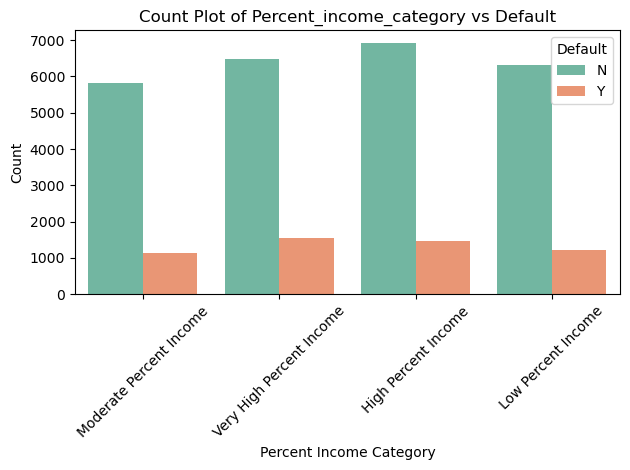

In [56]:
# List of selected categorical columns to iterate through
selected_columns = ['Home', 'Intent', 'Status','Rate_category','Age_category', 'Amount_category', 'Emp_length_category', 'Cred_length_category', 'Percent_income_category']  # Add other relevant columns here

# Loop through each column and create count plots against 'default'
for col in selected_columns:
    percentages = data_cleaned.groupby('Default')[col].value_counts(normalize=True).unstack() * 100
    print(f"Percentage distribution for {col}:\n{percentages}\n")
    
    # Count plot for each selected column against 'default'
    sns.countplot(x=col, hue='Default', data=data_cleaned, palette='Set2')
    
    plt.title(f'Count Plot of {col} vs Default')
    plt.xlabel(col.replace('_', ' ').title())  # Formatting the column name for display
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate labels if necessary
    plt.tight_layout()
    plt.show()

In [57]:
import pandas as pd
from scipy.stats import chi2_contingency

# List of categorical columns to test against Default
categorical_columns = ['Home', 'Intent', 'Status', 'Rate_category','Age_category', 'Amount_category', 'Emp_length_category', 'Cred_length_category','Percent_income_category']

# Loop through each column and perform Chi-Square test
for col in categorical_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(data_cleaned[col], data_cleaned['Default'])
    
    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Display the hypotheses
    print(f"Chi-Square Test for {col}:")
    print(f"Null Hypothesis (H0): There is no association between {col} and Default.")
    print(f"Alternative Hypothesis (H1): There is an association between {col} and Default.")
    
    # Display the Chi-Square statistic and p-value
    print(f"Chi2 Statistic: {chi2}")
    print(f"p-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Expected Frequencies:\n{expected}\n")
    
    # Interpret the p-value
    alpha = 0.05
    if p < alpha:
        print(f"Reject the null hypothesis: There is a significant association between {col} and Default.\n")
    else:
        print(f"Fail to reject the null hypothesis: No significant association between {col} and Default.\n")


Chi-Square Test for Home:
Null Hypothesis (H0): There is no association between Home and Default.
Alternative Hypothesis (H1): There is an association between Home and Default.
Chi2 Statistic: 151.3109837967595
p-value: 1.3738993471307858e-32
Degrees of Freedom: 3
Expected Frequencies:
[[10296.45597902  2153.54402098]
 [   83.52948224    17.47051776]
 [ 2035.30748308   425.69251692]
 [13125.70705566  2745.29294434]]

Reject the null hypothesis: There is a significant association between Home and Default.

Chi-Square Test for Intent:
Null Hypothesis (H0): There is no association between Intent and Default.
Alternative Hypothesis (H1): There is an association between Intent and Default.
Chi2 Statistic: 8.24734077549545
p-value: 0.14312071885175215
Degrees of Freedom: 5
Expected Frequencies:
[[4084.67438397  854.32561603]
 [5074.62280219 1061.37719781]
 [2785.41877408  582.58122592]
 [4775.23990545  998.76009455]
 [4317.06829     902.93171   ]
 [4503.97584432  942.02415568]]

Fail to reje

In [58]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30883 entries, 1 to 32580
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       30883 non-null  int64  
 1   Age                      30883 non-null  int64  
 2   Income                   30883 non-null  int64  
 3   Home                     30883 non-null  object 
 4   Emp_length               30883 non-null  float64
 5   Intent                   30883 non-null  object 
 6   Amount                   30883 non-null  int64  
 7   Rate                     30883 non-null  float64
 8   Status                   30883 non-null  int64  
 9   Percent_income           30883 non-null  float64
 10  Default                  30883 non-null  object 
 11  Cred_length              30883 non-null  int64  
 12  Percent_income_category  30883 non-null  object 
 13  Rate_category            30883 non-null  object 
 14  Cred_length_category     30

In [59]:
data_sel_cols =data_cleaned[['Home', 'Status','Amount', 'Emp_length', "Rate",'Percent_income','Default']]

In [60]:
data_sel_cols

,Home,Status,Amount,Emp_length,Rate,Percent_income,Default
1,OWN,0,1000,5.0,11.14,0.10,N
2,MORTGAGE,1,5500,1.0,12.87,0.57,N
5,OWN,1,2500,2.0,7.14,0.25,N
9,OWN,1,1600,6.0,14.74,0.16,N
11,OWN,1,4500,2.0,8.63,0.45,N
...,...,...,...,...,...,...,...
32575,RENT,0,5000,0.0,11.26,0.08,N
32576,MORTGAGE,0,5800,1.0,13.16,0.11,N
32577,MORTGAGE,0,17625,4.0,7.49,0.15,N
32579,MORTGAGE,0,15000,5.0,11.48,0.10,N


In [61]:
le_home = LabelEncoder()
le_default = LabelEncoder()
le_intent = LabelEncoder()

In [62]:
data['Home'] = le_home.fit_transform(data['Home'])
data['Default'] = le_default.fit_transform(data['Default'])
data['Intent'] = le_default.fit_transform(data['Intent'])

In [63]:
X = data.drop('Default', axis=1)
y = data['Default']

In [64]:
X.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Cred_length
0,0,22,59000,3,123.0,4,35000,16.02,1,0.59,3
1,1,21,9600,2,5.0,1,1000,11.14,0,0.10,2
2,2,25,9600,0,1.0,3,5500,12.87,1,0.57,3
3,3,23,65500,3,4.0,3,35000,15.23,1,0.53,2
4,4,24,54400,3,8.0,3,35000,14.27,1,0.55,4


In [65]:
y.head()

0    1
1    0
2    0
3    0
4    1
Name: Default, dtype: int32

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
#Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)


In [69]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [ ]:
model_accuracy = {}
for model_name, model in models.items():
    # Cross-validation
    scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='accuracy')
    print(f"{model_name} - Cross-Validation Accuracy: {np.mean(scores):.4f}")

    # Fit model and make predictions
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test_scaled)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} - Test Accuracy: {accuracy:.4f}")
    
    model_accuracy[model_name] = accuracy
best_model_name = max(model_accuracy, key=model_accuracy.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with Test Accuracy: {model_accuracy[best_model_name]:.4f}")
with open(f'{best_model_name}_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

print(f"\nBest model saved as '{best_model_name}_model.pkl'")

Logistic Regression - Cross-Validation Accuracy: 0.8319
Logistic Regression - Test Accuracy: 0.8102
Decision Tree - Cross-Validation Accuracy: 0.8544
Decision Tree - Test Accuracy: 0.8057
Random Forest - Cross-Validation Accuracy: 0.8889
Random Forest - Test Accuracy: 0.8249
